<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/cj_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
file_path = '/content/COMPLETE DATA SET 2.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the label
X = data.iloc[:, :-1].values  # Signal data
y = data.iloc[:, -1].values   # Labels (0 for HF, 1 for ZAM)

# Print shape of data
print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Data shape: (307, 2091)
Labels shape: (307,)


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/COMPLETE DATA SET 2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# Display the data types of the columns
print(data.dtypes)


           0          1          2          3          4          5  \
0  38.274353  38.274353  38.274353  38.274353  38.274353  38.274353   
1  60.743327  58.374448  52.307200  43.167179  37.306176  39.377123   
2  35.598535  30.805204  25.624235  21.627399  19.019032  18.516897   
3  25.595452  23.208748  22.575827  22.156338  20.145037  15.588119   
4  38.042662  42.871367  42.081415  35.981881  28.191039  18.636240   

           6          7          8          9  ...      2082      2083  \
0  38.274353  38.274353  38.274353  38.274353  ...  0.000068  0.000044   
1  33.675893  23.270452  26.359007  29.186764  ...  0.000149  0.000099   
2  16.391426  14.156888  16.742159  18.522038  ...  0.000105  0.000079   
3  12.127479  11.763777  12.586168  11.047582  ...  0.000061  0.000039   
4  13.543053  13.268878  13.004368  16.247301  ...  0.000162  0.000124   

       2084      2085      2086      2087      2088      2089  Type  LABEL  
0  0.000020 -0.000005 -0.000029 -0.000053 -0.000077

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/COMPLETE DATA SET 2.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the label and dropping non-numerical columns
X = data.iloc[:, :-1].select_dtypes(include=np.number).values  # Signal data, selecting only numerical columns
y = data.iloc[:, -1].values   # Labels (0 for HF, 1 for ZAM)

# Print shape of data
print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Normalize the signal data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN (assuming the data is 1D)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Data shape: (307, 2090)
Labels shape: (307,)
Training data shape: (245, 2090, 1)
Validation data shape: (62, 2090, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2088, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1044, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1042, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 521, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 519, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 259, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,243,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,274,753 (16.31 MB)

 Trainable params: 4,274,753 (16.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the dataset
file_path = '/content/COMPLETE DATA SET 2.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the label and dropping non-numerical columns
X = data.iloc[:, :-1].select_dtypes(include=np.number).values  # Signal data, selecting only numerical columns
y = data.iloc[:, -1].values   # Labels (0 for HF, 1 for ZAM)

# Convert string labels to numerical (assuming 'HF' is 0 and 'ZAM' is 1)
y = np.where(y == 'HF', 0, 1) # Convert labels to numerical values

# Print shape of data
print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Normalize the signal data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN (assuming the data is 1D)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Build the CNN model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Loss function for binary classification
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Data shape: (307, 2090)
Labels shape: (307,)
Training data shape: (245, 2090, 1)
Validation data shape: (62, 2090, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 2088, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1044, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 1042, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 521, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 519, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 259, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,243,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,274,753 (16.31 MB)

 Trainable params: 4,274,753 (16.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.6195 - loss: 0.7185 - val_accuracy: 0.8871 - val_loss: 0.3725
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.8658 - loss: 0.3840 - val_accuracy: 0.9677 - val_loss: 0.2241
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.9728 - loss: 0.1512 - val_accuracy: 0.9677 - val_loss: 0.1004
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.9725 - loss: 0.0651 - val_accuracy: 0.9677 - val_loss: 0.0425
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 1.0000 - val_loss: 0.0298
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9677 - val_loss: 0.0313
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss:

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0123
Validation Accuracy: 100.00%


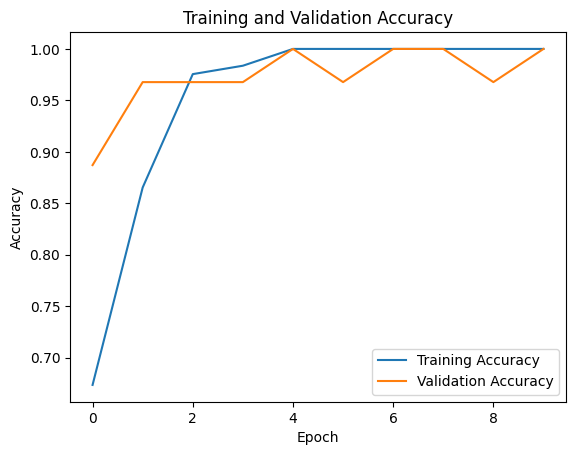

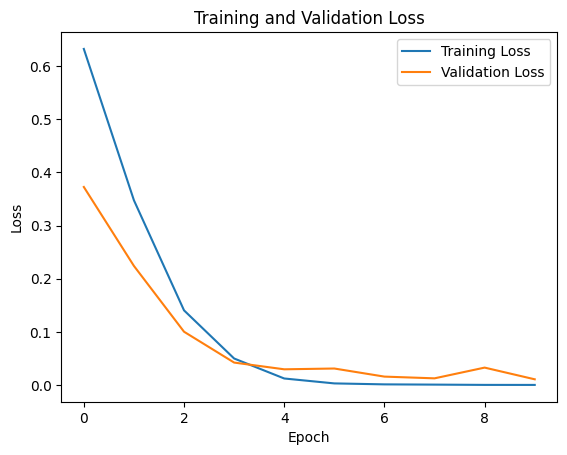

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the trained model
model.save('hf_zam_signal_cnn_model.h5')


In [ ]:
# Example: Predict on a new signal (assuming you have new data)
new_signal = X_val[0].reshape(1, -1, 1)  # Reshape a validation signal for prediction
prediction = model.predict(new_signal)

if prediction < 0.5:
    print("Predicted class: HF (Normal Skin Fibroblasts)")
else:
    print("Predicted class: ZAM (Tumor Associated Fibroblasts)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted class: ZAM (Tumor Associated Fibroblasts)
